<a href="https://colab.research.google.com/github/ameyark28/LGMVIP-DataScience/blob/main/Iris_Flowers_Classification_(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA SCIENCE INTERNSHIP AT *LETSGROWMORE*

AUTHOR: Ameya Kshirsagar

TASK: Iris Flowers Classification and visualization (Decision Tree) combined tasks

Dataset link:- http://archive.ics.uci.edu/ml/datasets/Iris




### Import the necessary libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from warnings import filterwarnings
filterwarnings('ignore')

### Load the dataset

In [56]:
df = pd.read_csv("/content/iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
header_list = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
df.to_csv("/content/Iris.csv", header=header_list, index=False)
df1 = pd.read_csv("/content/Iris.csv")
df1.head()# for top 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### EDA (Exploratory Data Analysis)

In [58]:
df1.shape #Number of columns and rows in dataset

(150, 5)

In [59]:
df1.columns #column headings

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [60]:
df1.info()  #datatypes and missing/null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
df1.describe() #summary of the dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [63]:
df1.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [64]:
df1.count()

SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [65]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


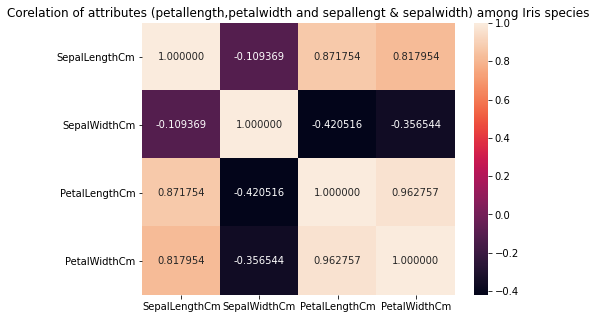

In [66]:
plt.subplots(figsize = (7,5))
sns.heatmap(df1.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petallength,petalwidth and sepallengt & sepalwidth) among Iris species")
plt.show()

#### As per the heatmap, it is observed that the Petal lenght and width are highly correlated.

### Data Visualization

### 1. Pair plot

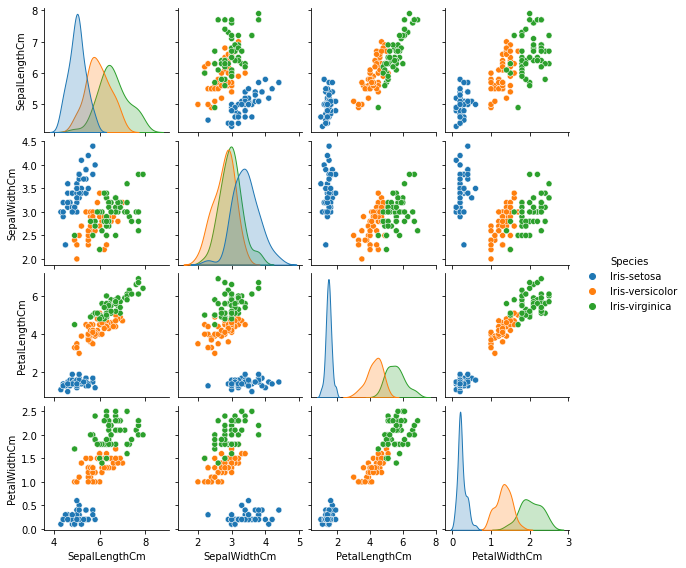

In [67]:
sns.pairplot(df1, hue='Species', palette=None, size=2)
plt.show()

#### In the Pair plots between different attributes, the Setosa is seperate whereas the Versiclor and Vriginica plots are together. 

### 2.1 Scatter plot of sepal length and sepal width

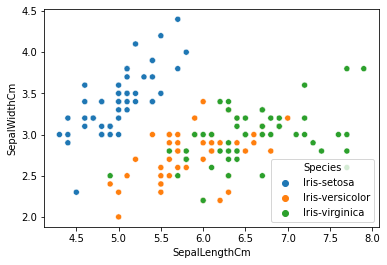

In [68]:
sns.scatterplot(data=x,x='SepalLengthCm',y='SepalWidthCm',hue=y)
plt.show()

### 2.2 Scatter plot of petal length and petal width

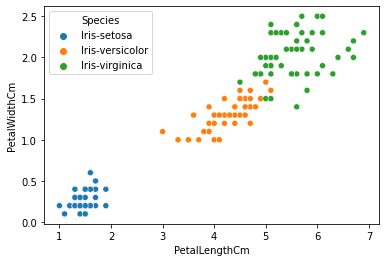

In [69]:
sns.scatterplot(data=x,x='PetalLengthCm',y='PetalWidthCm',hue=y)
plt.show()

### 3. Data comparision using Barplot/Subplot

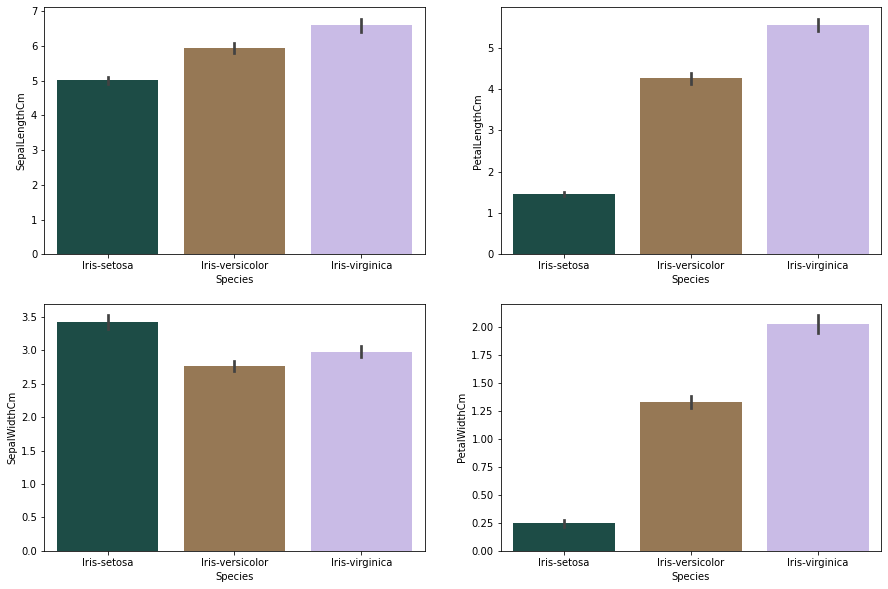

In [70]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = df1, palette="cubehelix")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = df1, palette="cubehelix")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = df1, palette="cubehelix")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = df1, palette="cubehelix")

# Test and Train data

In [71]:
x = df1.drop(columns="Species")
y = df1["Species"]

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 1)

In [73]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


In [74]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [75]:
y_train.head()

11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: Species, dtype: object

In [76]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [77]:
print("x_train=", len(x_train))
print("x_test=", len(x_test))
print("y_train=", len(y_train))
print("y_test=", len(y_test))

x_train= 90
x_test= 60
y_train= 90
y_test= 60


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Building models

### KNeighborsClassifier

In [79]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [80]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Accuracy of Model:\n",knn.score(x_train,y_train)*100)

Classification Report is:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 20]]
Accuracy of Model:
 96.66666666666667


###Decision Tree 

In [81]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
y_train_pred=model.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.9821428571428571

In [83]:
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9736842105263158

[Text(523.125, 951.3000000000001, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]\nclass = Iris-setosa'),
 Text(348.75, 679.5, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = Iris-setosa'),
 Text(697.5, 679.5, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = Iris-versicolor'),
 Text(348.75, 407.70000000000005, 'PetalWidthCm <= 1.65\ngini = 0.1\nsamples = 38\nvalue = [0, 36, 2]\nclass = Iris-versicolor'),
 Text(174.375, 135.89999999999998, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(523.125, 135.89999999999998, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(1046.25, 407.70000000000005, 'PetalLengthCm <= 5.05\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]\nclass = Iris-virginica'),
 Text(871.875, 135.89999999999998, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = Iris-virginica'),
 Text(1220.625, 135.89999999999998, 'gini = 0.0\nsamples = 33\nvalue = 

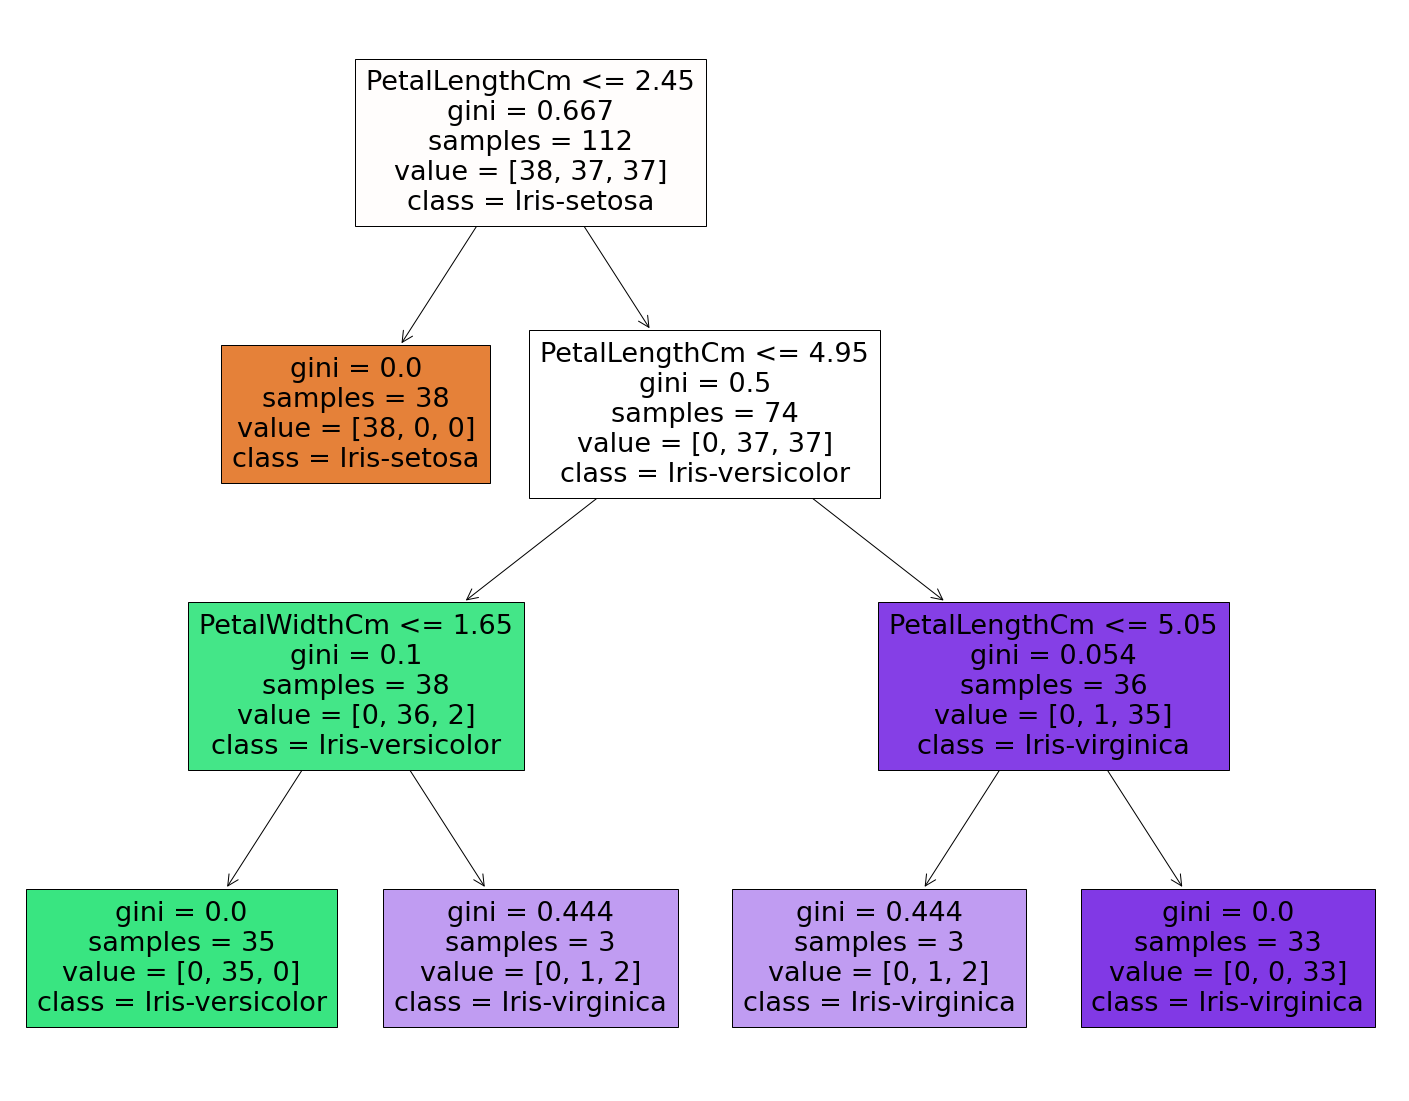

In [85]:
fig = plt.figure(figsize=(25,20))
plot_tree(model,feature_names=x.columns,  
                   class_names=list(d.keys()),
                   filled=True)

##Conclusion: DT peformed better than KNeighborsClassifier with an accuracy of 97.36%